# Learning curves

In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

## Data

In [5]:
sample_sizes = [100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000]
methods = ['maf', 'scandal']
method_labels = ['MAF', 'SCANDAL']
n_methods = len(methods)

In [4]:
learning_curves_train = []
learning_curves_val = []

for method in methods:
    learning_curves_train_this_method = []
    learning_curves_val_this_method = []
    
    for sample_size in sample_sizes:
        learning_curve_train = np.load('../data/results/epidemiology/' + method
                                 + '/epidemiology_' + method + '_trainingsamplesize_'
                                 + str(sample_size) + '_train_loss.npy')
        learning_curve_val = np.load('../data/results/epidemiology/' + method
                                 + '/epidemiology_' + method + '_trainingsamplesize_'
                                 + str(sample_size) + '_validation_loss.npy')
        
        learning_curves_train_this_method.append(learning_curve_train)
        learning_curves_val_this_method.append(learning_curve_val)
        
    learning_curves_train.append(learning_curves_train_this_method)
    learning_curves_val.append(learning_curves_val_this_method)
    
learning_curves_train = np.array(learning_curves_train)
learning_curves_val = np.array(learning_curves_val)


## Plot learning curves

In [10]:
colors = ['C' + str(i) for i in range(10)]

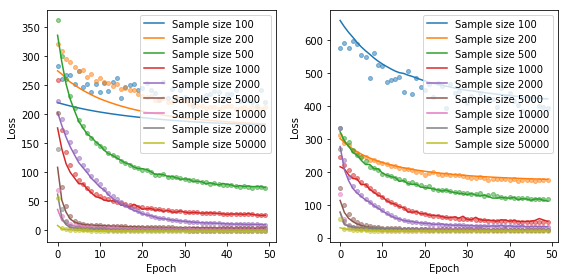

In [21]:
fig = plt.figure(figsize=(4. * n_methods,4))



for m, method in enumerate(method_labels):
    ax = plt.subplot(1,n_methods,m+1)

    for s, sample_size in enumerate(sample_sizes):
        plt.plot(learning_curves_train[m][s],
                 c=colors[s], ls=' ', marker='o', ms=4., alpha=0.5)
        plt.plot(learning_curves_val[m][s],
                 c=colors[s], lw=1.5, ls='-',
                 label='Sample size ' + str(sample_size))

    plt.legend()

    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    #ax.set_yscale("log", nonposy='clip')
        
    

plt.tight_layout()
plt.show()
